**Spark Bağlantısı ve Veri Okuma**

In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=240663818e782d02138f113479b0ce07cac2bd52841125d42dacde7002819183
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [52]:
from pyspark.sql import SparkSession

In [53]:
Spark = SparkSession.builder.appName('Movie Analysis').getOrCreate()

In [107]:
df_Book = Spark.read.csv("books.csv",header = "True", inferSchema="True")

 **Veri İnceleme**

In [56]:
df_Book.show(3)

+---+-------+------------+-------+-----------+---------+----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------------------+--------------------+
| id|book_id|best_book_id|work_id|books_count|     isbn|          isbn13|             authors|original_publication_year|      original_title|               title|language_code|average_rating|ratings_count|work_ratings_count|work_text_reviews_count|ratings_1|ratings_2|ratings_3|ratings_4|ratings_5|           image_url|     small_image_url|
+---+-------+------------+-------+-----------+---------+----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------------------

In [57]:
df_Book.printSchema()

root
 |-- id: integer (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- best_book_id: integer (nullable = true)
 |-- work_id: integer (nullable = true)
 |-- books_count: integer (nullable = true)
 |-- isbn: string (nullable = true)
 |-- isbn13: double (nullable = true)
 |-- authors: string (nullable = true)
 |-- original_publication_year: double (nullable = true)
 |-- original_title: string (nullable = true)
 |-- title: string (nullable = true)
 |-- language_code: string (nullable = true)
 |-- average_rating: string (nullable = true)
 |-- ratings_count: string (nullable = true)
 |-- work_ratings_count: string (nullable = true)
 |-- work_text_reviews_count: string (nullable = true)
 |-- ratings_1: double (nullable = true)
 |-- ratings_2: integer (nullable = true)
 |-- ratings_3: integer (nullable = true)
 |-- ratings_4: integer (nullable = true)
 |-- ratings_5: integer (nullable = true)
 |-- image_url: string (nullable = true)
 |-- small_image_url: string (nullable = true)


**Veri İşleme ve Analiz**

In [58]:
df_rating = Spark.read.csv("ratings.csv", header = "True", inferSchema="True")

In [59]:
df_rating.show(3)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    439|     3|
|      1|    588|     5|
+-------+-------+------+
only showing top 3 rows



In [60]:
df_rating.printSchema()

root
 |-- book_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- rating: integer (nullable = true)



In [61]:
df_rating.groupBy("book_id").avg("rating").show(5)

+-------+-----------+
|book_id|avg(rating)|
+-------+-----------+
|    148|       3.57|
|    463|       3.99|
|    471|       3.84|
|    496|       3.79|
|    833|       3.44|
+-------+-----------+
only showing top 5 rows



In [62]:
df_rating.groupBy("book_id").avg("rating").orderBy("avg(rating)").show()

+-------+------------------+
|book_id|       avg(rating)|
+-------+------------------+
|   1793|              1.96|
|   4045| 2.235294117647059|
|   7636|            2.3125|
|   1822| 2.350515463917526|
|   1409|              2.43|
|   4399|2.4574468085106385|
|   4991| 2.462686567164179|
|   3550|              2.49|
|   4009|              2.53|
|   4283|              2.54|
|   4282|2.5555555555555554|
|   8466|2.5806451612903225|
|   8874|              2.61|
|   5706| 2.654320987654321|
|   8007|              2.67|
|   2749|2.6702127659574466|
|   4614|              2.71|
|   9523|2.7157894736842105|
|   8166|              2.73|
|   9021|              2.74|
+-------+------------------+
only showing top 20 rows



In [63]:
df =df_rating.groupBy("book_id").avg("rating").orderBy("avg(rating)",ascending=False)

In [64]:
from pyspark.sql.functions import *

In [65]:
df.select("book_id", bround("avg(rating)",2)).show()

+-------+----------------------+
|book_id|bround(avg(rating), 2)|
+-------+----------------------+
|   7947|                  4.82|
|   5207|                  4.78|
|   6920|                  4.78|
|   9566|                  4.78|
|   8946|                  4.77|
|   6361|                  4.77|
|   3275|                  4.77|
|   4483|                  4.75|
|   5580|                  4.75|
|   6590|                  4.75|
|   1308|                  4.74|
|   3628|                  4.73|
|   8978|                  4.73|
|   3753|                  4.72|
|   8109|                  4.71|
|   1788|                   4.7|
|   9076|                   4.7|
|   8663|                  4.69|
|   9141|                  4.69|
|   2244|                  4.68|
+-------+----------------------+
only showing top 20 rows



In [66]:
df_rating = df.select("book_id",bround("avg(rating)",2)).withColumnRenamed("bround(avg(rating), 2)","rating")

In [67]:
df_rating.show()

+-------+------+
|book_id|rating|
+-------+------+
|   7947|  4.82|
|   5207|  4.78|
|   6920|  4.78|
|   9566|  4.78|
|   8946|  4.77|
|   6361|  4.77|
|   3275|  4.77|
|   4483|  4.75|
|   5580|  4.75|
|   6590|  4.75|
|   1308|  4.74|
|   3628|  4.73|
|   8978|  4.73|
|   3753|  4.72|
|   8109|  4.71|
|   1788|   4.7|
|   9076|   4.7|
|   8663|  4.69|
|   9141|  4.69|
|   2244|  4.68|
+-------+------+
only showing top 20 rows



In [68]:
df_rating.printSchema()

root
 |-- book_id: integer (nullable = true)
 |-- rating: double (nullable = true)



In [104]:
Book_df=df_Book.select("book_id","title")

In [105]:
dfn=Book_df.join(df_rating, on="book_id", how="inner")

In [106]:
dfn.orderBy(col("rating").desc()).show()

+-------+--------------------+------+
|book_id|               title|rating|
+-------+--------------------+------+
|   9566|Still Life with W...|  4.78|
|   4708|The Beautiful and...|  4.66|
|   9569|     Villa Incognito|  4.62|
|   9531|Peter and the Sha...|  4.56|
|   3885|The Taste of Home...|  4.55|
|   5344|          Hard Times|  4.54|
|   2767|A People's Histor...|  4.54|
|   2865|Girl with a Pearl...|  4.53|
|    976|     Deception Point|   4.5|
|   9712|Love in the Time ...|   4.5|
|   7039|Tears of the Gira...|  4.49|
|   6862|           Amsterdam|  4.49|
|   1618|The Curious Incid...|  4.48|
|   5346|      The Last Juror|  4.47|
|   9943| The Atonement Child|  4.46|
|   4373|First They Killed...|  4.45|
|   2956|The Adventures of...|  4.44|
|    998|The Millionaire N...|  4.44|
|   3698|  The Quiet American|  4.43|
|   8648|Xenocide (Ender's...|  4.43|
+-------+--------------------+------+
only showing top 20 rows



**Veri Filtreleme ve Analiz:**

In [86]:
df_Book.orderBy("original_publication_year", ascending=True).select("title", "original_publication_year").show(10)

+--------------------+-------------------------+
|               title|original_publication_year|
+--------------------+-------------------------+
|The Lord of the R...|                     NULL|
|   Nancy Drew: #1-64|                     NULL|
|Marked / Betrayed...|                     NULL|
|The Lord of the R...|                     NULL|
|BookRags Summary:...|                     NULL|
|Dr. Seuss's Green...|                     NULL|
|The Doomsday Key ...|                     NULL|
|Absolute Boyfrien...|                     NULL|
|A Shade of Blood ...|                     NULL|
|Twilight: The Com...|                     NULL|
+--------------------+-------------------------+
only showing top 10 rows



In [85]:
df_Book.filter("original_publication_year is not null AND original_title is not null" ).show()

+---+--------+------------+--------+-----------+----------+----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------------------+--------------------+
| id| book_id|best_book_id| work_id|books_count|      isbn|          isbn13|             authors|original_publication_year|      original_title|               title|language_code|average_rating|ratings_count|work_ratings_count|work_text_reviews_count|ratings_1|ratings_2|ratings_3|ratings_4|ratings_5|           image_url|     small_image_url|
+---+--------+------------+--------+-----------+----------+----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+-----------

In [87]:
filtrBookDf = df_Book.filter("original_publication_year is not null AND original_publication_year > 0" )

In [88]:
filtrBookDf.orderBy("original_publication_year",ascending=True).select("original_title","original_publication_year").show(10)

+--------------------+-------------------------+
|      original_title|original_publication_year|
+--------------------+-------------------------+
|       Metamorphoses|                      8.0|
|   De vita Caesarum |                    119.0|
|      Τὰ εἰς ἑαυτόν |                    180.0|
|Confessiones Sanc...|                    397.0|
|القرآن‎‎ [al-Qurʾān]|                    609.0|
|كِتَاب أَلْف لَيْ...|                    800.0|
|             Beowulf|                    975.0|
|رباعیات [Robāʿiāt...|                   1120.0|
|      Essential Rumi|                   1273.0|
|  La Divina Commedia|                   1308.0|
+--------------------+-------------------------+
only showing top 10 rows



In [89]:
filtrBookDf.createOrReplaceGlobalTempView("books")

In [91]:
filtrBookDf.filter(filtrBookDf["original_publication_year"] > 1960) \
       .groupBy("original_publication_year") \
       .agg(count("*").alias("count")) \
       .show()

+-------------------------+-----+
|original_publication_year|count|
+-------------------------+-----+
|                   1988.0|   89|
|                   1976.0|   39|
|                   1979.0|   48|
|                   1987.0|   83|
|                   1978.0|   48|
|                   1968.0|   35|
|                   2010.0|  473|
|                   1967.0|   24|
|                   1964.0|   19|
|                   1993.0|  115|
|                   2001.0|  226|
|                   1965.0|   23|
|                   1984.0|   67|
|                   1973.0|   35|
|                   1980.0|   54|
|                   1966.0|   21|
|                   1997.0|  168|
|                   1992.0|  112|
|                   1990.0|   99|
|                   1995.0|  126|
+-------------------------+-----+
only showing top 20 rows



In [92]:
resultDF = filtrBookDf.filter(filtrBookDf["original_publication_year"] > 1960) \
       .groupBy("original_publication_year") \
       .agg(count("*").alias("count")) \
       .toPandas()

**Görselleştirme**

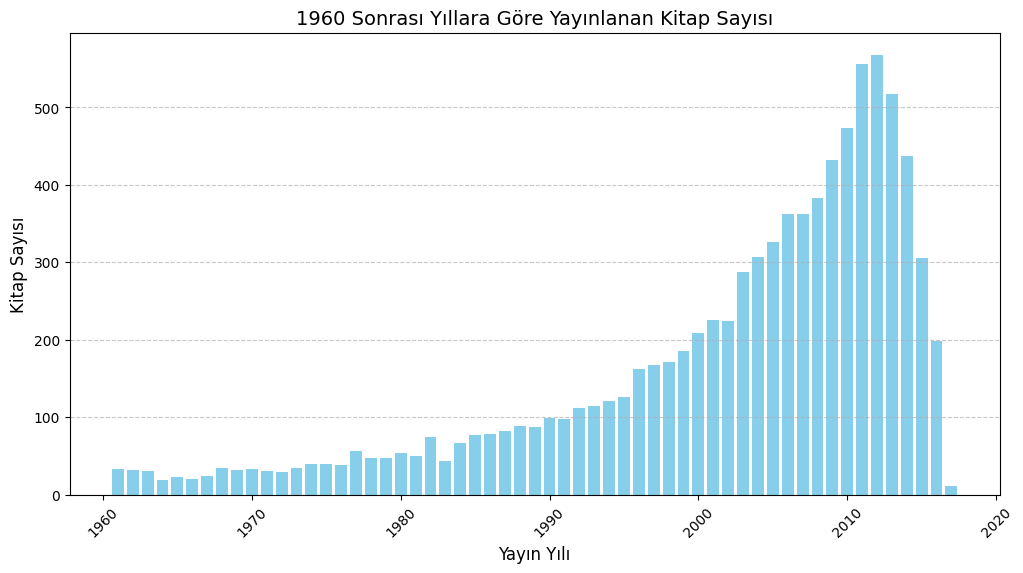

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(resultDF['original_publication_year'], resultDF['count'], color='skyblue')
plt.xlabel('Yayın Yılı', fontsize=12)
plt.ylabel('Kitap Sayısı', fontsize=12)
plt.title('1960 Sonrası Yıllara Göre Yayınlanan Kitap Sayısı', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
